In [2]:
#import all libraries
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load the data
df= pd.read_csv('car_price_dataset.csv')
print(df.head())

        Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       Automatic   231440   
3        Audi      Q5  2023          2.0  Electric          Manual   160971   
4  Volkswagen    Golf  2003          2.6    Hybrid  Semi-Automatic   286618   

   Doors  Owner_Count  Price  
0      3            5   8501  
1      2            3  12092  
2      4            2  11171  
3      2            1  11780  
4      3            3   2867  


In [4]:
## data cleaning 
# check for missing values
print(df.isnull().sum())


Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64


In [5]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [6]:
# drop rows with missing values
df =df.dropna()
# drop duplicate values
df= df.drop_duplicates()

#convert data types  year to int,price to float
df['Year'] = df['Year'].astype(int)
df['Price'] = df['Price']. astype(float)


In [7]:
#create a new feature(car age => year to current year)
#calculate car age from year. 
current_year= datetime.now().year
df['Car_Age']= current_year- df['Year']


In [8]:
#encode catergorical variable 
df = pd.get_dummies(df,columns=['Brand','Fuel_Type','Transmission'],drop_first=True)

In [9]:
# drop original column not needed
df= df.drop(columns=['Model','Year'])

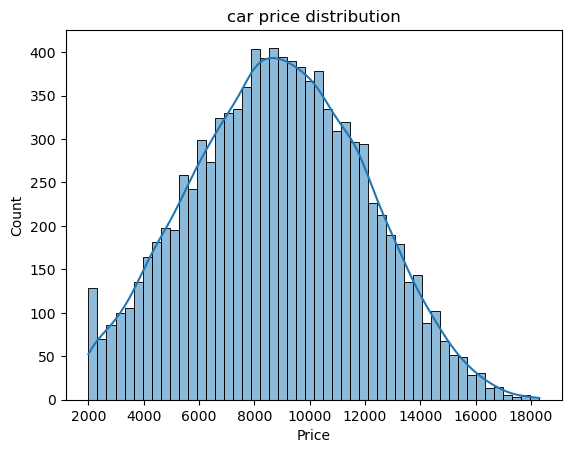

In [10]:
#visualize distribution of car prices , mileage, other feature
# plot car price prediction
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('car price distribution')
plt.show()

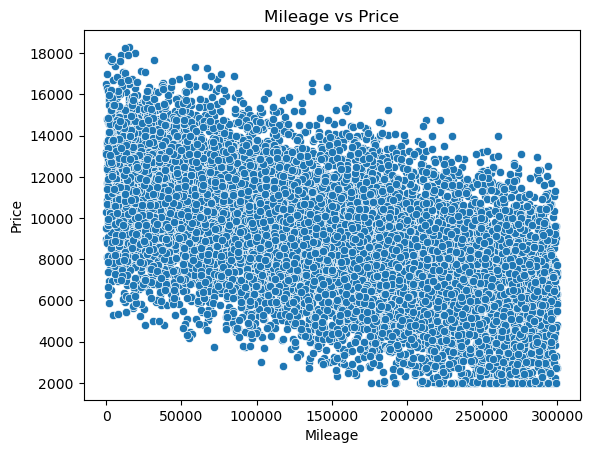

In [11]:
#plot mileage vs. price 
sns.scatterplot(x= 'Mileage', y='Price', data=df)
plt.title('Mileage vs Price')
plt.show()

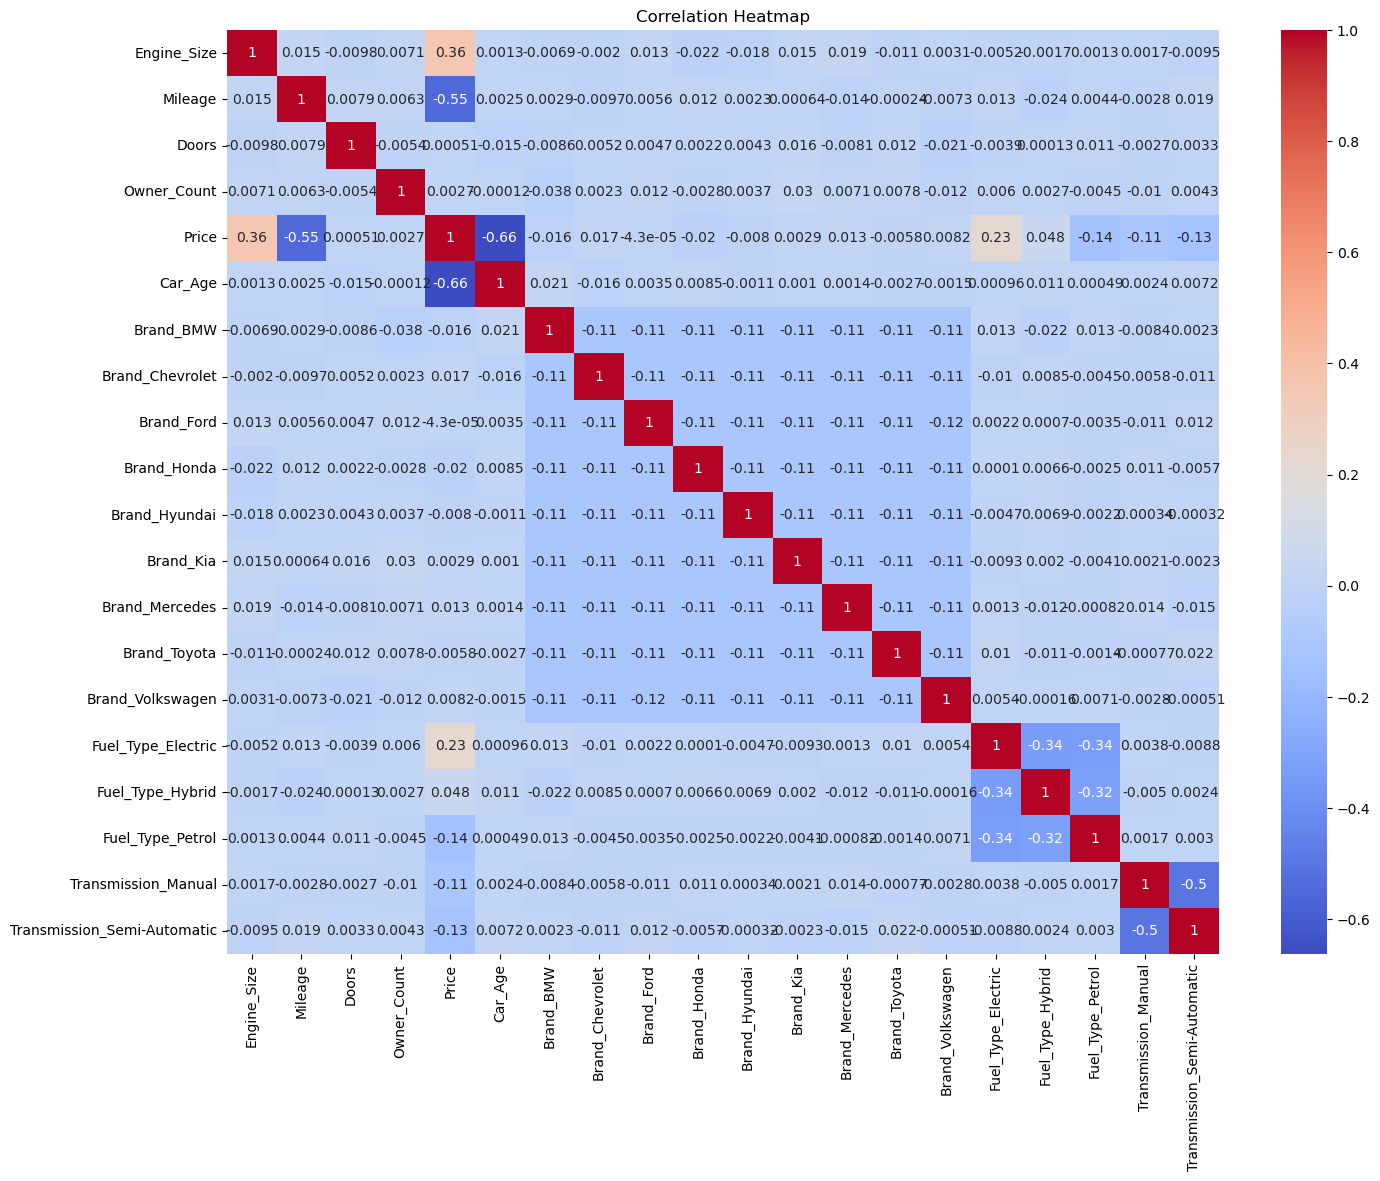

In [12]:
#correlation heatmap 
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
features = ['Mileage', 'Engine_Size', 'Car_Age'] + list(df.columns[df.columns.str.startswith('Brand_')]) + list(df.columns[df.columns.str.startswith('Fuel_Type_')]) + list(df.columns[df.columns.str.startswith('Transmission_')])
X = df[features]
y = df['Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='linear')
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R²': r2}
    #print(f'{name}: RMSE = {rmse}, R² = {r2}')

/Users/faheemunnisasyeda/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/faheemunnisasyeda/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/faheemunnisasyeda/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/faheemunnisasyeda/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will b

In [14]:
# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                                  RMSE        R²
Linear Regression            64.750425  0.999544
Random Forest               493.258024  0.973519
Gradient Boosting           225.666885  0.994457
Support Vector Regression  1968.201798  0.578374


In [15]:
from sklearn.model_selection import GridSearchCV

# Example: Tune Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print(f'Best Parameters: {grid_search.best_params_}')

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


Linear Regression:
The RMSE is very low, indicating that the model's predictions are very close to the actual values.
The R² is extremely close to 1, suggesting that the model explains almost all the variance in the target variable.

Random Forest:
The RMSE is higher than Linear Regression, but still reasonable.
The R² is high, indicating that the model explains a large portion of the variance.

Gradient Boosting:
The RMSE is lower than Random Forest but higher than Linear Regression.
The R² is very high, close to Linear Regression.

Support Vector Regression:
The RMSE is very high, indicating poor performance.
The R² is low, suggesting that the model explains only about 57.8% of the variance

Linear Regression is the best-performing model in terms of both RMSE and R².
However, its performance seems too good to be true. This could indicate data leakage or an overly simple dataset.

In [16]:
#check for data leakage
# Ensure 'Price' is not in the feature set
if 'Price' in X.columns:
    print("Data leakage detected: 'Price' is in the feature set.")
else:
    print("No data leakage: 'Price' is not in the feature set.")

No data leakage: 'Price' is not in the feature set.


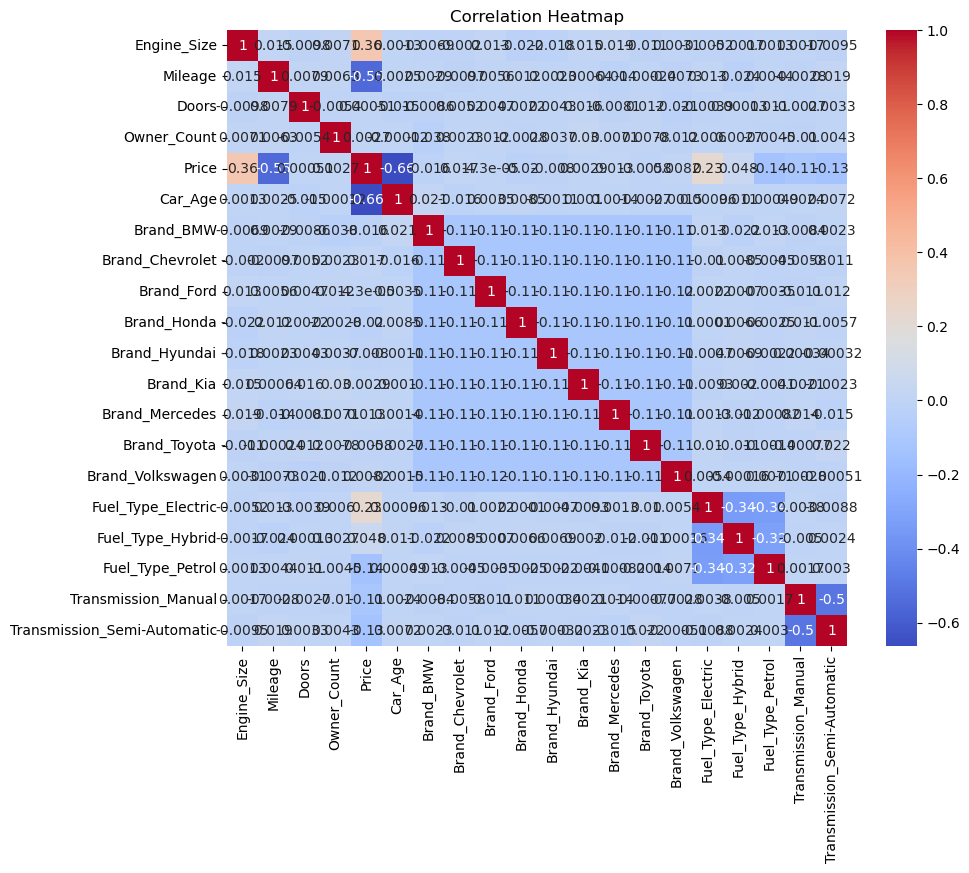

Price                          1.000000
Engine_Size                    0.357403
Fuel_Type_Electric             0.226043
Fuel_Type_Hybrid               0.047637
Brand_Chevrolet                0.017456
Brand_Mercedes                 0.013171
Brand_Volkswagen               0.008166
Brand_Kia                      0.002866
Owner_Count                    0.002656
Doors                          0.000511
Brand_Ford                    -0.000043
Brand_Toyota                  -0.005768
Brand_Hyundai                 -0.007976
Brand_BMW                     -0.015938
Brand_Honda                   -0.020167
Transmission_Manual           -0.112186
Transmission_Semi-Automatic   -0.133073
Fuel_Type_Petrol              -0.141650
Mileage                       -0.551227
Car_Age                       -0.663036
Name: Price, dtype: float64


In [17]:
#Check for Highly Correlated Features
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Check correlation of features with the target variable
print(corr_matrix['Price'].sort_values(ascending=False))

Highly correlated features can cause overfitting and data leakage.
If any feature has a correlation close to 1 or -1 with Price, it might be causing data leakage.

In [18]:
#Verify Train-Test Split
#Ensure the dataset is split correctly into training and testing sets.
#The test set should not be used during training or feature engineering.

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify shapes of the splits
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Training set: (8000, 17), (8000,)
Testing set: (2000, 17), (2000,)
